In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2 as cv
import glob
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import math

In [97]:

class ContrastData:
    param=None
    #CONSTRUCTORES:---------------------------
    def __init__(self,image,contrast_level,operation):
        self.image=image
        self.contrast_level=contrast_level
        self.operation=operation
        
    def __init__(self,image,contrast_level,operation,param):
        self.image=image
        self.contrast_level=contrast_level
        self.operation=operation
        self.param=param
    #-------------------------------------------
    
def apply_transformation(gris_image,operation_name,gamma=None):
        if(operation_name=='gamma'):
            c = 255/(pow(np.max(gris_image),gamma)) 
            gamma_transformed = c * pow(gris_image,gamma) 
            gamma_transformed = np.array(gamma_transformed, dtype = np.uint8)
            file_name=operation_name+'_transformed_FALSO.jpg'
            cv.imwrite(file_name, gamma_transformed)
            img2 = cv.imread(cv.samples.findFile(file_name))
            gris2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
            L_max = np.max(gris2)
            L_min = np.min(gris2)

                # compute local contrast:
                #FORMULA DEL CONTRASTE: (MAXl-MINl)/(MAXl+MINl),
                #como pueden haber varios máximos y mínimos, es necesario conocer la media
            contrast = (L_max-L_min)/(L_max+L_min)
            if(np.isnan(contrast).any()):
                print("With gamma value="+str(gamma)+", contrast=NaN")
                return None

                # get average across whole image
            average_contrast = 100*np.mean(contrast)
            print("With gamma value="+str(gamma)+", contrast="+str(contrast)+"%")
            return ContrastData(gris2,average_contrast,operation_name,gamma) 

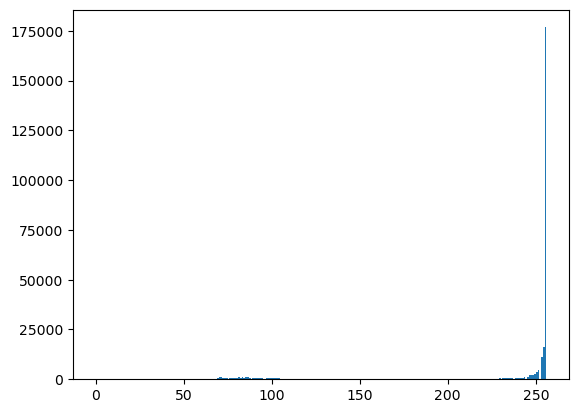

In [4]:
#1º PASAR A NIVELES DE GRISE
img = cv.imread(cv.samples.findFile("Photos/cocacola.jpg"))
gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.hist(gris.ravel(),256,[0,256]);
plt.show()

In [5]:
#2ºOBTENER MAYOR CONTRASTE POSIBLE==> BÚSQUEDA DE LA TRANSFORMACIÓN DE INTENSIDAD ÓPTIMA


Para este paso, será necesario hacer lo siguiente:
- 1ºAplicar diferentes operaciones y calcular nivel de contraste. Aquellos que necesiten un parámetro, se realizará una busqueda del valor óptimo. Ej: gamma
- 2ºUna vez hecho todas las operaciones, se escogerá aquella que tenga mayor nivel de contraste

Tras hacer eso, ya podremos capturar adecuadamente el contorno de la figura

Starting to process op: gamma ----------------


C:\Users\andre\AppData\Local\Temp\ipykernel_26508\608204315.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
  contrast = (L_max-L_min)/(L_max+L_min)


With gamma value=0.0, contrast=0.0%
With gamma value=0.03125, contrast=0.08547009%
With gamma value=0.0625, contrast=0.18691589%
With gamma value=0.09375, contrast=0.29591838%
With gamma value=0.125, contrast=0.4431818%
With gamma value=0.15625, contrast=0.57763976%
With gamma value=0.1875, contrast=0.7517241%
With gamma value=0.21875, contrast=0.86764705%
With gamma value=0.25, contrast=1.0819672%
With gamma value=0.28125, contrast=1.2477876%
With gamma value=0.3125, contrast=1.4190476%
With gamma value=0.34375, contrast=1.6185567%
With gamma value=0.375, contrast=1.8863636%
With gamma value=0.40625, contrast=2.175%
With gamma value=0.4375, contrast=2.4324324%
With gamma value=0.46875, contrast=2.6811595%
With gamma value=0.5, contrast=2.96875%
With gamma value=0.53125, contrast=3.5357144%
With gamma value=0.5625, contrast=3.7924528%
With gamma value=0.59375, contrast=4.2916665%
With gamma value=0.625, contrast=4.9069767%
With gamma value=0.65625, contrast=5.35%
With gamma value=0.687

ValueError: Image size of 500x100000 pixels is too large. It must be less than 2^16 in each direction.

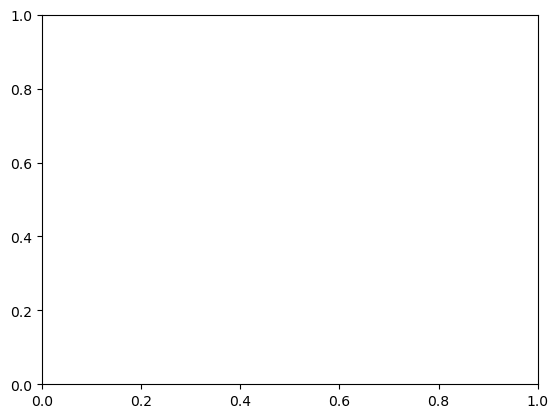

ValueError: Image size of 500x100000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x100000 with 200 Axes>

In [111]:
#gamma,logaritmica,exponencial, ecualizacion y a trozos
data=[]
operations=['gamma','log','exp']
fig, ax = plt.subplots()
for op in operations:
    print('Starting to process op:',op,'----------------')
    if(op=='gamma'):
        for i in range(0,200):
            gamma=i/32
            t=apply_transformation(gris_image=gris,operation_name=op,gamma=gamma)
            ax.imshow(t.image, cmap='gray')     # cmap='gray' asegura que la imagen se muestre en niveles de grises
            plt.title(f'Imagen {i}, con gamma {gamma}')         # Opcional: poner un título a cada subplot
            plt.axis('off')
    print('Finalization-----------------------------')
    plt.show()

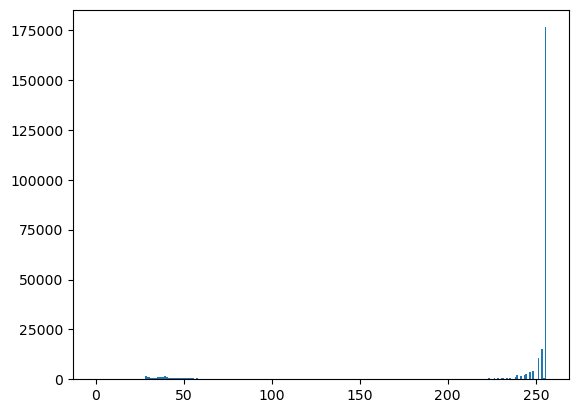

In [74]:
#2º OBTENER MAYOR CONTRASTE POSIBLE, AÑADIENDO EL MINIMO RUIDO POSIBLE
#PROBANDO CON T.GAMMA
gamma=1.6875
c = 255/(pow(np.max(gris),gamma)) 
gamma_transformed = c * pow(gris,gamma) 
  
gamma_transformed = np.array(gamma_transformed, dtype = np.uint8) 
  
# Save the output. 
cv.imwrite('gamma_transformed.jpg', gamma_transformed)
img2 = cv.imread(cv.samples.findFile("gamma_transformed.jpg"))
gris2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.hist(gris2.ravel(),256,[0,256]);
plt.show()

In [ ]:
# Detectamos los bordes con Canny
canny = cv.Canny(img2, 50, 150)
 
cv.imshow("canny", canny)
 
# Buscamos los contornos
(contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de monedas por consola
print("He encontrado {} objetos".format(len(contornos)))
 
cv.drawContours(img,contornos,-1,(0,0,255), 2)
cv.imshow("contornos", img)
 
cv.waitKey(0)